# Введение в глубинное обучение, ФКН ВШЭ

## Домашнее задание 1. Полносвязные нейронные сети. 

### Общая информация

Оценка после штрафа после мягкого дедлайна вычисляется по формуле $M_{\text{penalty}} = M_{\text{full}} \cdot 0.85^{t/1440}$, где $M_{\text{full}}$ — полная оценка за работу без учета штрафа, а $t$ — время в минутах, прошедшее после мягкого дедлайна (округление до двух цифр после запятой). Таким образом, спустя первые сутки после мягкого дедлайна вы не можете получить оценку выше 8.5, а если сдать через четыре дня после мягкого дедлайна, то ваш максимум — 5.22 балла.

### Оценивание и штрафы

Максимально допустимая оценка за работу — 10 баллов. Сдавать задание после указанного срока сдачи нельзя.

Задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов. Если вы нашли решение какого-то из заданий (или его часть) в открытом источнике, необходимо указать ссылку на этот источник в отдельном блоке в конце вашей работы (скорее всего вы будете не единственным, кто это нашел, поэтому чтобы исключить подозрение в плагиате, необходима ссылка на источник).

Неэффективная реализация кода может негативно отразиться на оценке. Также оценка может быть снижена за плохо читаемый код и плохо оформленные графики. Все ответы должны сопровождаться кодом или комментариями о том, как они были получены.

### О задании

В этом задании вам предстоит обучить полносвязную нейронную сеть для предсказания года выпуска песни по ее аудио-признакам. Для этого мы будем использовать [Million Songs Dataset](https://samyzaf.com/ML/song_year/song_year.html).

In [ ]:
#%pip install seaborn
#%pip install -U scikit-learn

In [1]:
#🌏🌏🌏🌏🌏🌏🌏🌏🌏🌏🌏🌏🌏🌏🌏🌏🌏🌏🌏🌏🌏
import torch
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from torch import nn
from torch.utils.data import TensorDataset, DataLoader
from tqdm import tqdm
from IPython.display import clear_output

plt.rcParams.update({'font.size': 16})
sns.set_style('whitegrid')
np.random.seed(0xFA1AFE1)

Начнем с того, что скачаем и загрузим данные:

In [ ]:
#!wget -O data.txt.zip https://archive.ics.uci.edu/ml/machine-learning-databases/00203/YearPredictionMSD.txt.zip

In [21]:
#🌏🌏🌏🌏🌏🌏🌏🌏🌏🌏🌏🌏🌏🌏🌏🌏🌏🌏🌏🌏🌏
df = pd.read_csv('YearPredictionMSD.txt', header=None)
df

,0,1,2,3,4,5,6,7,8,9,...,81,82,83,84,85,86,87,88,89,90
0,2001,49.94357,21.47114,73.07750,8.74861,-17.40628,-13.09905,-25.01202,-12.23257,7.83089,...,13.01620,-54.40548,58.99367,15.37344,1.11144,-23.08793,68.40795,-1.82223,-27.46348,2.26327
1,2001,48.73215,18.42930,70.32679,12.94636,-10.32437,-24.83777,8.76630,-0.92019,18.76548,...,5.66812,-19.68073,33.04964,42.87836,-9.90378,-32.22788,70.49388,12.04941,58.43453,26.92061
2,2001,50.95714,31.85602,55.81851,13.41693,-6.57898,-18.54940,-3.27872,-2.35035,16.07017,...,3.03800,26.05866,-50.92779,10.93792,-0.07568,43.20130,-115.00698,-0.05859,39.67068,-0.66345
3,2001,48.24750,-1.89837,36.29772,2.58776,0.97170,-26.21683,5.05097,-10.34124,3.55005,...,34.57337,-171.70734,-16.96705,-46.67617,-12.51516,82.58061,-72.08993,9.90558,199.62971,18.85382
4,2001,50.97020,42.20998,67.09964,8.46791,-15.85279,-16.81409,-12.48207,-9.37636,12.63699,...,9.92661,-55.95724,64.92712,-17.72522,-1.49237,-7.50035,51.76631,7.88713,55.66926,28.74903
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
515340,2006,51.28467,45.88068,22.19582,-5.53319,-3.61835,-16.36914,2.12652,5.18160,-8.66890,...,4.81440,-3.75991,-30.92584,26.33968,-5.03390,21.86037,-142.29410,3.42901,-41.14721,-15.46052
515341,2006,49.87870,37.93125,18.65987,-3.63581,-27.75665,-18.52988,7.76108,3.56109,-2.50351,...,32.38589,-32.75535,-61.05473,56.65182,15.29965,95.88193,-10.63242,12.96552,92.11633,10.88815
515342,2006,45.12852,12.65758,-38.72018,8.80882,-29.29985,-2.28706,-18.40424,-22.28726,-4.52429,...,-18.73598,-71.15954,-123.98443,121.26989,10.89629,34.62409,-248.61020,-6.07171,53.96319,-8.09364
515343,2006,44.16614,32.38368,-3.34971,-2.49165,-19.59278,-18.67098,8.78428,4.02039,-12.01230,...,67.16763,282.77624,-4.63677,144.00125,21.62652,-29.72432,71.47198,20.32240,14.83107,39.74909


Посмотрим на статистики по данным.

In [3]:
df.describe()

,0,1,2,3,4,5,6,7,8,9,...,81,82,83,84,85,86,87,88,89,90
count,515345.000000,515345.000000,515345.000000,515345.000000,515345.000000,515345.000000,515345.000000,515345.000000,515345.000000,515345.000000,...,515345.000000,515345.000000,515345.000000,515345.000000,515345.000000,515345.000000,515345.000000,515345.000000,515345.000000,515345.000000
mean,1998.397082,43.387126,1.289554,8.658347,1.164124,-6.553601,-9.521975,-2.391089,-1.793236,3.727876,...,15.755406,-73.461500,41.542422,37.934119,0.315751,17.669213,-26.315336,4.458641,20.035136,1.329105
std,10.931046,6.067558,51.580351,35.268585,16.322790,22.860785,12.857751,14.571873,7.963827,10.582861,...,32.099635,175.618889,122.228799,95.050631,16.161764,114.427905,173.977336,13.346557,185.558247,22.088576
min,1922.000000,1.749000,-337.092500,-301.005060,-154.183580,-181.953370,-81.794290,-188.214000,-72.503850,-126.479040,...,-437.722030,-4402.376440,-1810.689190,-3098.350310,-341.789120,-3168.924570,-4319.992320,-236.039260,-7458.378150,-381.424430
25%,1994.000000,39.954690,-26.059520,-11.462710,-8.487500,-20.666450,-18.440990,-10.780600,-6.468420,-2.293660,...,-1.812650,-139.555160,-20.986900,-4.669540,-6.781590,-31.580610,-101.530300,-2.566090,-59.509270,-8.820210
50%,2002.000000,44.258500,8.417850,10.476320,-0.652840,-6.007770,-11.188390,-2.046670,-1.736450,3.822310,...,9.171850,-53.090060,28.791060,33.623630,0.820840,15.598470,-21.204120,3.117640,7.759730,0.053050
75%,2006.000000,47.833890,36.124010,29.764820,8.787540,7.741870,-2.388960,6.508580,2.913450,9.961820,...,26.274480,13.478730,89.661770,77.785800,8.470990,67.794960,52.389330,9.967740,86.351610,9.679520
max,2011.000000,61.970140,384.065730,322.851430,335.771820,262.068870,166.236890,172.402680,126.741270,146.297950,...,840.973380,4469.454870,3210.701700,1734.079690,260.544900,3662.065650,2833.608950,463.419500,7393.398440,677.899630


Целевая переменная, год выпуска песни, записана в первом столбце. Посмотрим на ее распределение.

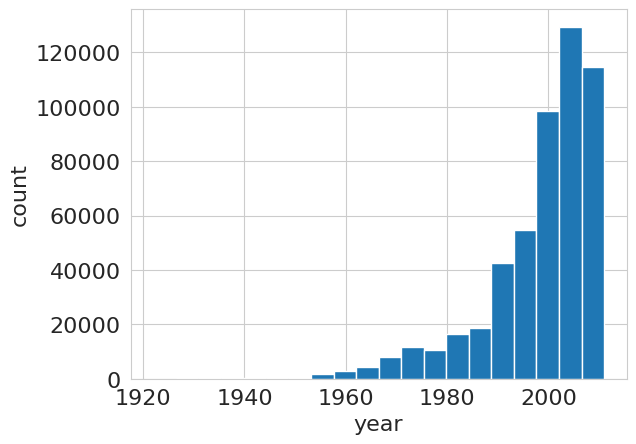

Range: 1922 - 2011
Unique values: 89


In [ ]:
plt.hist(df.iloc[:, 0], bins=20)
plt.xlabel('year')
plt.ylabel('count')
plt.show()
print(f'Range: {df.iloc[:, 0].min()} - {df.iloc[:, 0].max()}')
print(f'Unique values: {np.unique(df.iloc[:, 0]).size}')

Разобьем данные на обучение и тест (не меняйте здесь ничего, чтобы сплит был одинаковым у всех).

In [8]:
X = df.iloc[:, 1:].values
y = df.iloc[:, 0].values

train_size = int(0.75 * X.shape[0])
X_train = X[:train_size, :]
y_train = y[:train_size]
X_test = X[train_size:, :]
y_test = y[train_size:]
X_train.shape, X_test.shape

((386508, 90), (128837, 90))

**Задание 0 (0 баллов, но при невыполнении максимальная оценка за всю работу &mdash; 0 баллов).** Мы будем использовать MSE как метрику качества. Прежде чем обучать нейронные сети, нам нужно проверить несколько простых бейзлайнов, чтобы было с чем сравнить более сложные алгоритмы. Для этого бучите `Ridge` регрессию из `sklearn`. Кроме того, посчитайте качество при наилучшем константном прогнозе.

In [9]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error

ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)
y_pred = ridge.predict(X_test)
mse_error = mean_squared_error(y_test, y_pred)
print(mse_error)

89.74966397222076


Теперь приступим к экспериментам с нейросетями. Для начала отделим от данных валидацию:

In [10]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=0xE2E4)
X_train.shape, X_val.shape

((289881, 90), (96627, 90))

## Глава I. Заводим нейронную сеть (5 баллов)

**Задание 1.1 (0.5 баллов).** Заполните пропуски в функции `train_and_validate`. Она поможет нам запускать эксперименты. Можете также реализовать поддержку обучения на GPU, чтобы эксперименты считались быстрее. Бесплатно воспользоваться GPU можно на сервисах **Google Colab** и **Kaggle**.

In [4]:
#🌏🌏🌏🌏🌏🌏🌏🌏🌏🌏🌏🌏🌏🌏🌏🌏🌏🌏🌏🌏🌏
def plot_losses(train_losses, train_metrics, val_losses, val_metrics):
    '''
    Plot losses and metrics while training
      - train_losses: sequence of train losses
      - train_metrics: sequence of train MSE values
      - val_losses: sequence of validation losses
      - val_metrics: sequence of validation MSE values
    '''
    clear_output()
    fig, axs = plt.subplots(1, 2, figsize=(15, 5))
    axs[0].plot(range(1, len(train_losses) + 1), train_losses, label='train')
    axs[0].plot(range(1, len(val_losses) + 1), val_losses, label='val')
    axs[1].plot(range(1, len(train_metrics) + 1), train_metrics, label='train')
    axs[1].plot(range(1, len(val_metrics) + 1), val_metrics, label='val')

    if max(train_losses) / min(train_losses) > 10:
        axs[0].set_yscale('log')

    if max(train_metrics) / min(train_metrics) > 10:
        axs[0].set_yscale('log')

    for ax in axs:
        ax.set_xlabel('epoch')
        ax.legend()

    axs[0].set_ylabel('loss')
    axs[1].set_ylabel('MSE')
    plt.show()


def train_and_validate(model, optimizer, criterion, metric, train_loader, val_loader,
                       num_epochs, verbose=True):
    '''
    Train and validate neural network
      - model: neural network to train
      - optimizer: optimizer chained to a model
      - criterion: loss function class
      - metric: function to measure MSE taking neural networks predictions
                 and ground truth labels
      - train_loader: DataLoader with train set
      - val_loader: DataLoader with validation set
      - num_epochs: number of epochs to train
      - verbose: whether to plot metrics during training
    Returns:
      - train_mse: training MSE over the last epoch
      - val_mse: validation MSE after the last epoch
    '''
    train_losses, val_losses = [], []
    train_metrics, val_metrics = [], []

    for epoch in range(1, num_epochs + 1):
        model.train()
        running_loss, running_metric = 0, 0
        pbar = tqdm(train_loader, desc=f'Training {epoch}/{num_epochs}') \
            if verbose else train_loader

        for i, (X_batch, y_batch) in enumerate(pbar, 1):
            '''
            YOUR CODE HERE (－.－)...zzzZZZzzzZZZ
            Do forward and backward passes
            predictions = ...
            loss = ...
            '''
            optimizer.zero_grad()
            predictions = model(X_batch)
            loss = criterion(predictions, y_batch)
            loss.backward()
            optimizer.step()
            
            with torch.no_grad():
                metric_value = metric(predictions, y_batch)
                if type(metric_value) == torch.Tensor:
                    metric_value = metric_value.item()
                    
                running_loss += loss.item() * X_batch.shape[0]
                running_metric += metric_value * X_batch.shape[0]

            if verbose and i % 100 == 0:
                pbar.set_postfix({'loss': loss.item(), 'MSE': metric_value})

        train_losses += [running_loss / len(train_loader.dataset)]
        train_metrics += [running_metric / len(train_loader.dataset)]

        model.eval()
        running_loss, running_metric = 0, 0
        pbar = tqdm(val_loader, desc=f'Validating {epoch}/{num_epochs}') \
            if verbose else val_loader

        for i, (X_batch, y_batch) in enumerate(pbar, 1):
            with torch.no_grad():
                '''
                YOUR CODE HERE (－.－)...zzzZZZzzzZZZ
                Do evaluation
                predictions = ...
                loss = ...
                '''
                predictions = model(X_batch)
                loss = criterion(predictions, y_batch)
                metric_value = metric(predictions, y_batch)
                if type(metric_value) == torch.Tensor:
                    metric_value = metric_value.item()
                running_loss += loss.item() * X_batch.shape[0]
                running_metric += metric_value * X_batch.shape[0]

            if verbose and i % 100 == 0:
                pbar.set_postfix({'loss': loss.item(), 'MSE': metric_value})

        val_losses += [running_loss / len(val_loader.dataset)]
        val_metrics += [running_metric / len(val_loader.dataset)]

        if verbose:
            plot_losses(train_losses, train_metrics, val_losses, val_metrics)
    
    if verbose:
        print(f'Validation MSE: {val_metrics[-1]:.3f}')

    return train_metrics[-1], val_metrics[-1]

**Задание 1.2 (0.75 балла).** Попробуем обучить нашу первую нейронную сеть. Здесь целевая переменная дискретная &mdash; это год выпуска песни. Поэтому будем учить сеть на классификацию c помощью [кросс-энтропийной функции потерь](https://pytorch.org/docs/stable/generated/torch.nn.CrossEntropyLoss.html).

- В качестве архитектуры сети возьмите два линейных слоя с активацией ReLU между ними c числом скрытых нейронов, равным 128.
- Используйте SGD с `lr=1e-2`.
- Возьмите размер мини-батча около 32-64, примерно 3-4 эпох обучения должно быть достаточно.
- Скорее всего вам пригодится `torch.utils.data.TensorDataset`. Когда будете конвертировать numpy-массивы в torch-тензоры, используйте тип `torch.float32`.
- Также преобразуйте целевую переменную так, чтобы ее значения принимали значения от $0$ до $C-1$, где $C$ &mdash; число классов (лучше передайте преобразованное значение в TensorDataset, исходное нам еще пригодится)
- В качестве параметра `metric` в `train_and_validate` передайте lambda-выражение, которое считает MSE по выходу нейронной сети и целевой переменной. В случае классификации предсказывается класс с наибольшей вероятностью (или, что то же самое, с наибольшим значением **логита**$^1$).

$^1$ **Логит** &mdash; выход последнего линейного слоя, может принимать любые вещественные значения. Если применить Softmax к логитам, то получатся вероятности распределения классов.

In [5]:
#🌏🌏🌏🌏🌏🌏🌏🌏🌏🌏🌏🌏🌏🌏🌏🌏🌏🌏🌏🌏🌏
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
device

device(type='cpu')

In [11]:
classes = df[0].unique() - 1922
C = len(classes)
classes

array([79, 85, 86, 80, 82, 81, 77, 70, 75, 65, 78, 83, 74, 76, 87, 84, 71,
       69, 11,  8, 13, 73, 19, 68, 21, 72, 52, 54, 53, 48, 49, 59, 67, 47,
       50, 51, 61, 88, 63, 66, 57, 58, 64, 36, 56, 46, 40, 45, 60, 62, 39,
       44, 42, 38, 43, 41, 55, 20, 23, 33,  4,  5, 35, 37, 34, 32,  6, 26,
        0, 30, 31, 22, 24, 27, 28, 17, 10, 16, 15, 14, 18, 29,  7, 12, 25,
        9,  3,  2, 89])

In [12]:
y_train_classes = y_train - 1922
y_train_target = np.zeros(y_train.shape[0])
for idx_i, i in enumerate(classes):
    for idx_j, j in enumerate(y_train_classes):
        if i == j:
            y_train_target[idx_j] = idx_i

In [13]:
y_test_classes = y_test - 1922
y_test_target = np.zeros(y_test.shape[0])
for idx_i, i in enumerate(classes):
    for idx_j, j in enumerate(y_test_classes):
        if i == j:
            y_test_target[idx_j] = idx_i

In [14]:
num_epochs = 4
dataset_train = TensorDataset(torch.from_numpy(X_train).to(torch.float32).to(device), torch.from_numpy(y_train_target).to(torch.long).to(device))
dataset_test = TensorDataset(torch.from_numpy(X_test).to(torch.float32).to(device), torch.from_numpy(y_test_target).to(torch.long).to(device))
train_loader = DataLoader(dataset_train, batch_size=64, shuffle=True)
test_loader = DataLoader(dataset_test, batch_size=64, shuffle=False)

model = nn.Sequential(
    nn.Linear(90, 128),
    nn.ReLU(),
    nn.Linear(128, C)
).to(device)
optimizer = torch.optim.SGD(model.parameters(), lr=0.01, momentum=0.9)
criterion = torch.nn.CrossEntropyLoss().to(device)
scheduler = torch.optim.lr_scheduler.CosineAnnealingLR(optimizer, num_epochs)

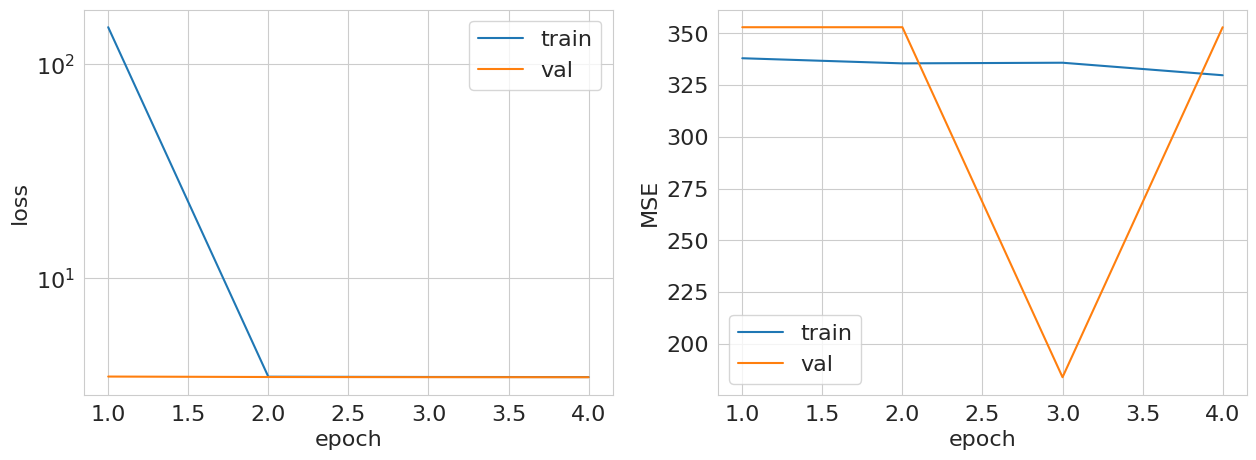

Validation MSE: 352.920


(329.72778484943467, 352.91971250506657)

In [15]:
train_and_validate(model, optimizer, criterion, lambda y_pred, y: torch.sum((y_pred.argmax(dim=1) - y) ** 2) / y.shape[0], train_loader, test_loader,
                       num_epochs)

**Задание 1.3 (0.5 балла).** Прокомментируйте ваши наблюдения. Удалось ли побить бейзлайн? Как вы думаете, хорошая ли идея учить классификатор для этой задачи? Почему?

**Ответ:** 🐒 Побить бейзлайн не удалось. Скор на порядок хуже получился. Не оч хорошая идея здесь применять классификацию, т.к. остались не рассмотренными года, не содержащиеся в датасете. Лучше такую задачу решать регрессией.

**Задание 1.4 (0.75 балла).** Теперь попробуем решать задачу как регрессию. Обучите нейронную сеть на [MSE](https://pytorch.org/docs/stable/generated/torch.nn.MSELoss.html).

- Используйте такие же гиперпараметры обучения.
- Когда передаете целевую переменную в TensorDataset, сделайте reshape в (-1, 1).
- Не забудьте изменить lambda-выражение, которые вы передаете в `train_and_validate`.
- Если что-то пойдет не так, можете попробовать меньшие значения `lr`.

In [19]:
num_epochs = 4
dataset_train = TensorDataset(torch.from_numpy(X_train).to(torch.float32).to(device), torch.from_numpy(y_train.reshape(-1, 1)).to(torch.float32).to(device))
dataset_test = TensorDataset(torch.from_numpy(X_test).to(torch.float32).to(device), torch.from_numpy(y_test.reshape(-1, 1)).to(torch.float32).to(device))
train_loader = DataLoader(dataset_train, batch_size=64, shuffle=True)
test_loader = DataLoader(dataset_test, batch_size=64, shuffle=False)

model = nn.Sequential(
    nn.Linear(90, 128),
    nn.ReLU(),
    nn.Linear(128, 1)
).to(device)
optimizer = torch.optim.SGD(model.parameters(), lr=0.00001, momentum=0.9)
criterion = torch.nn.MSELoss().to(device)
scheduler = torch.optim.lr_scheduler.CosineAnnealingLR(optimizer, num_epochs)

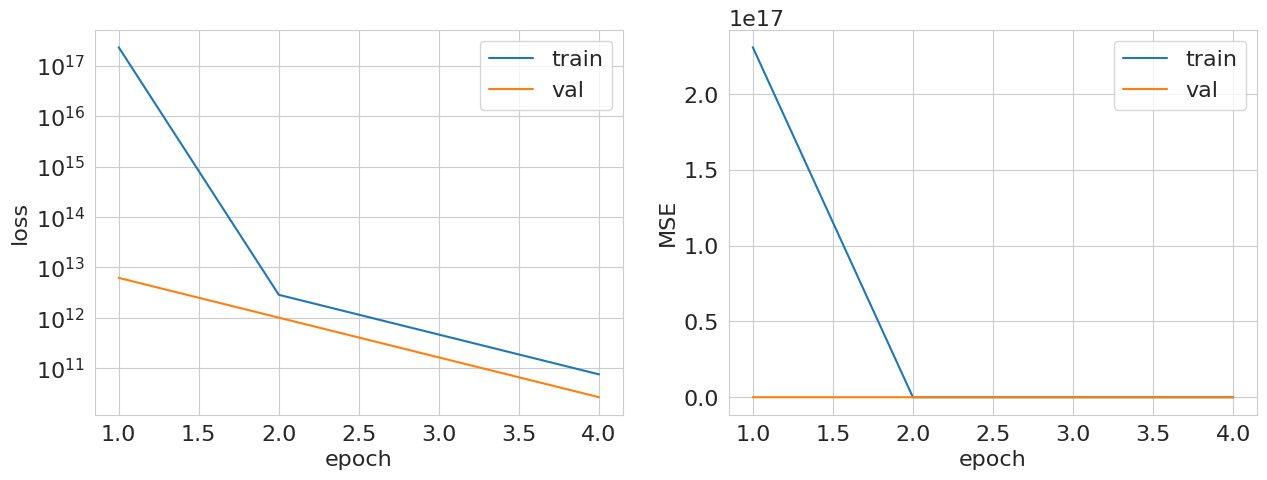

Validation MSE: 26839226990.903


(76067430141.77542, 26839226990.9028)

In [20]:
train_and_validate(model, optimizer, criterion, lambda y_pred, y: torch.sum((y_pred - y) ** 2) / y.shape[0], train_loader, test_loader,
                       num_epochs)

**Задание 1.5 (0.5 балла).** Получилось ли у вас стабилизировать обучение? Помогли ли меньшие значения `lr`? Стало ли лучше от замены классификации на регрессию? Как вы думаете, почему так происходит? В качестве подсказки можете посмотреть на распределение целевой переменной и магнитуду значений признаков.

**Ответ:** 🐪 Стабилизировать немного удалось, лосс стал меньше, но результаты хуже бейзлайна. Исследуя значения целевой переменной можно заметить, что требуется нормализация. Также и для значений признаков, они разного порядка и имеют разброс.

**Задание 1.6 (0.75 балла).** Начнем с того, что попробуем отнормировать целевую переменную. Для этого воспользуемся min-max нормализацией, чтобы целевая переменная принимала значения от 0 до 1. Реализуйте функции `normalize` и `denormalize`, которые, соответственно, нормируют целевую переменную и применяют обратное преобразование. Минимум и максимум оцените по обучающей выборке (то есть эти константы должны быть фиксированными и не зависеть от передаваемой выборки).

In [22]:
#🌏🌏🌏🌏🌏🌏🌏🌏🌏🌏🌏🌏🌏🌏🌏🌏🌏🌏🌏🌏🌏
X = df.iloc[:, 1:].values
y = df.iloc[:, 0].values

train_size = int(0.75 * X.shape[0])
X_train = X[:train_size, :]
y_train = y[:train_size].astype(np.float32)
X_test = X[train_size:, :]
y_test = y[train_size:].astype(np.float32)
X_train.shape, X_test.shape

((386508, 90), (128837, 90))

In [23]:
#🌏🌏🌏🌏🌏🌏🌏🌏🌏🌏🌏🌏🌏🌏🌏🌏🌏🌏🌏🌏🌏
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=0xE2E4)
X_train.shape, X_val.shape

((289881, 90), (96627, 90))

In [24]:
#🌏🌏🌏🌏🌏🌏🌏🌏🌏🌏🌏🌏🌏🌏🌏🌏🌏🌏🌏🌏🌏
MIN_TRAIN = y_train.min()
MAX_TRAIN = y_train.max()

In [25]:
#🌏🌏🌏🌏🌏🌏🌏🌏🌏🌏🌏🌏🌏🌏🌏🌏🌏🌏🌏🌏🌏
def normalize(sample):
    '''
    Min-max normalization to convert sample to [0, 1] range
    '''
    np.add(sample, -MIN_TRAIN, out=sample)
    np.multiply(sample, 1.0 / (MAX_TRAIN - MIN_TRAIN), out=sample)
    pass

def denormalize(sample):
    '''
    Denormalize sample from [0, 1] to initial range
    '''
    np.multiply(sample, MAX_TRAIN - MIN_TRAIN, out=sample)
    np.add(sample, MIN_TRAIN, out=sample)
    pass

Теперь повторите эксперимент из **задания 1.4**, обучаясь на нормированной целевой переменной. Сделаем также еще одно изменение: добавим [сигмоидную активацию](https://pytorch.org/docs/stable/generated/torch.nn.Sigmoid.html) после последнего линейного слоя сети. Таким образом мы гарантируем, что нейронная сеть предсказывает числа из промежутка $[0, 1]$. Использование активации - довольно распространенный прием, когда мы хотим получить числа из определенного диапазона значений. 

In [26]:
#🌏🌏🌏🌏🌏🌏🌏🌏🌏🌏🌏🌏🌏🌏🌏🌏🌏🌏🌏🌏🌏
normalize(y_train)
normalize(y_test)

In [27]:
#🌏🌏🌏🌏🌏🌏🌏🌏🌏🌏🌏🌏🌏🌏🌏🌏🌏🌏🌏🌏🌏
y_test

array([0.94382024, 0.94382024, 0.94382024, ..., 0.94382024, 0.94382024,
       0.9325843 ], dtype=float32)

In [30]:
num_epochs = 4
dataset_train = TensorDataset(torch.from_numpy(X_train).to(torch.float32).to(device), torch.from_numpy(y_train.reshape(-1, 1)).to(torch.float32).to(device))
dataset_test = TensorDataset(torch.from_numpy(X_test).to(torch.float32).to(device), torch.from_numpy(y_test.reshape(-1, 1)).to(torch.float32).to(device))
train_loader = DataLoader(dataset_train, batch_size=64, shuffle=True)
test_loader = DataLoader(dataset_test, batch_size=64, shuffle=False)

model = nn.Sequential(
    nn.Linear(90, 128),
    nn.ReLU(),
    nn.Linear(128, 1),
    nn.Sigmoid()
).to(device)
optimizer = torch.optim.SGD(model.parameters(), lr=0.0001, momentum=0.9)
criterion = torch.nn.MSELoss().to(device)
scheduler = torch.optim.lr_scheduler.CosineAnnealingLR(optimizer, num_epochs)

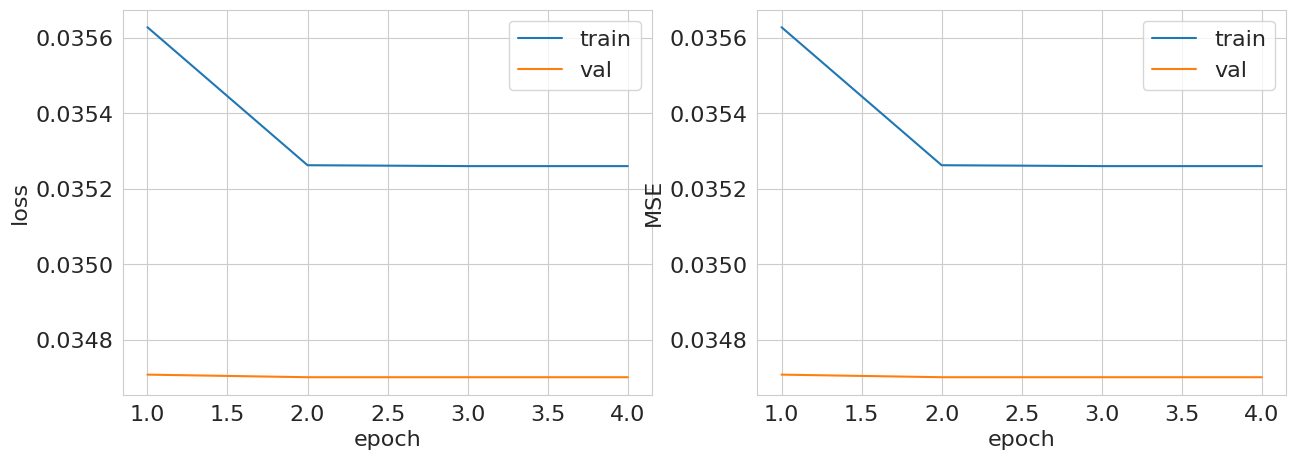

Validation MSE: 0.035


(0.03526056325926222, 0.03470106517913412)

In [31]:
train_and_validate(model, optimizer, criterion, lambda y_pred, y: torch.sum((y_pred - y) ** 2) / y.shape[0], train_loader, test_loader,
                       num_epochs)

**Задание 1.7 (0.5 балла).** Сравните результаты этого эксперимента с предыдущим запуском. 

**Ответ:** 🦌 Здесь уже нет этих сумашедших порядков 1е14 для лосса и mse выборки трейн. И действительно стало лучше обучаться.

**Задание 1.8 (0.75 балла).** На этот раз попробуем отнормировать не только целевую переменную, но и сами данные, которые подаются сети на вход. Для них будем использовать нормализацию через среднее и стандартное отклонение. Преобразуйте данные и повторите прошлый эксперимент. Скорее всего, имеет смысл увеличить число эпох обучения.

In [32]:
#🌏🌏🌏🌏🌏🌏🌏🌏🌏🌏🌏🌏🌏🌏🌏🌏🌏🌏🌏🌏🌏
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

In [33]:
num_epochs = 8
dataset_train = TensorDataset(torch.from_numpy(X_train_scaled).to(torch.float32).to(device), torch.from_numpy(y_train.reshape(-1, 1)).to(torch.float32).to(device))
dataset_test = TensorDataset(torch.from_numpy(X_test_scaled).to(torch.float32).to(device), torch.from_numpy(y_test.reshape(-1, 1)).to(torch.float32).to(device))
train_loader = DataLoader(dataset_train, batch_size=64, shuffle=True)
test_loader = DataLoader(dataset_test, batch_size=64, shuffle=False)

model = nn.Sequential(
    nn.Linear(90, 128),
    nn.ReLU(),
    nn.Linear(128, 1),
    nn.Sigmoid()
).to(device)
optimizer = torch.optim.SGD(model.parameters(), lr=0.01, momentum=0.9)
criterion = torch.nn.MSELoss().to(device)
scheduler = torch.optim.lr_scheduler.CosineAnnealingLR(optimizer, num_epochs)

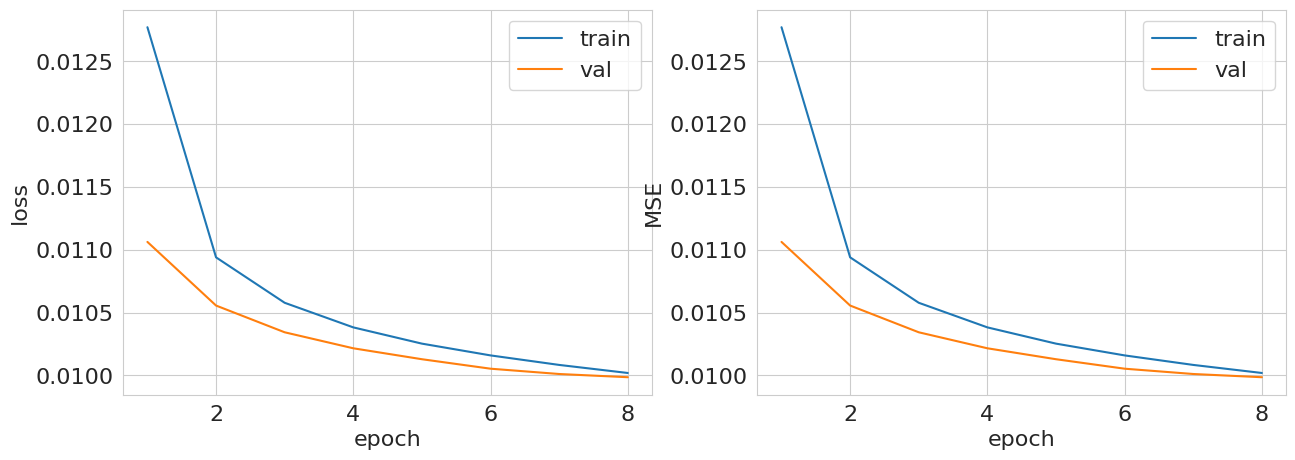

Validation MSE: 0.010


(0.010018718486293161, 0.009984953308802667)

In [34]:
train_and_validate(model, optimizer, criterion, lambda y_pred, y: torch.sum((y_pred - y) ** 2) / y.shape[0], train_loader, test_loader,
                       num_epochs)

In [35]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error

ridge = Ridge(alpha=1.0)
ridge.fit(X_train_scaled, y_train)
y_pred = ridge.predict(X_test_scaled)
mse_error = mean_squared_error(y_test, y_pred)
print(mse_error)

0.011335386181232985


🐦 Да, удалось получить mse немного лучше - на одну тысячную.

Если вы все сделали правильно, то у вас должно было получиться качество, сравнимое с `Ridge` регрессией.

**Мораль:** как видите, нам пришлось сделать очень много хитрых телодвижений, чтобы нейронная сеть работала хотя бы так же, как и простая линейная модель. Здесь, конечно, показан совсем экстремальный случай, когда без нормализации данных нейронная сеть просто не учится. Как правило, в реальности завести нейронную сеть из коробки не очень сложно, но вот заставить ее работать на полную &mdash; куда более трудоемкая задача. Написание пайплайнов обучения нейросетевых моделей требует большой аккуратности, а дебаг часто превращается в угадайку. К счастью, очень часто на помощь приходит интуиция, и мы надеемся, что вы сможете выработать ее в течение нашего курса. Начнем с двух советов, которые стоит принять на вооружение:

- Обязательно начинаем любые эксперименты с бейзлайнов: без них мы бы не поняли, что нейронная сеть не учится в принципе.
- При постановке эксперментов старайтесь делать минимальное количество изменений за раз (в идеале одно!): только так можно понять, какие конкретно изменения влияют на результат.

## Часть 2. Улучшаем нейронную сеть (5 баллов)

Продолжим экспериментировать с нейронной сетью, чтобы добиться еще лучшего качества.

**Задание 2.1 (1 балл).** Давайте попробуем другие оптимизаторы. Обучите нейросеть с помощью SGD+momentum и Adam. Опишите свои наблюдения и в дальнейших запусках используйте лучший оптимизатор. Для Adam обычно берут learning rate поменьше, в районе $10^{-3}$.

In [ ]:
num_epochs = 8
dataset_train = TensorDataset(torch.from_numpy(X_train_scaled).to(torch.float32).to(device), torch.from_numpy(y_train.reshape(-1, 1)).to(torch.float32).to(device))
dataset_test = TensorDataset(torch.from_numpy(X_test_scaled).to(torch.float32).to(device), torch.from_numpy(y_test.reshape(-1, 1)).to(torch.float32).to(device))
train_loader = DataLoader(dataset_train, batch_size=64, shuffle=True)
test_loader = DataLoader(dataset_test, batch_size=64, shuffle=False)

model = nn.Sequential(
    nn.Linear(90, 128),
    nn.ReLU(),
    nn.Linear(128, 1),
    nn.Sigmoid()
).to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=0.0001)
criterion = torch.nn.MSELoss().to(device)
scheduler = torch.optim.lr_scheduler.CosineAnnealingLR(optimizer, num_epochs)

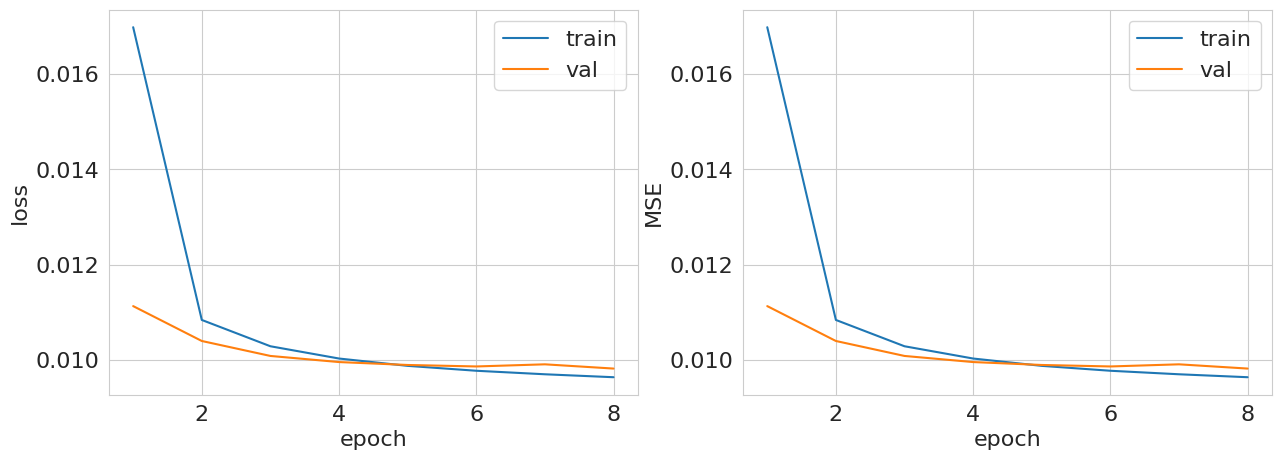

Validation MSE: 0.010


(0.009637104388184195, 0.009818777825100766)

In [ ]:
train_and_validate(model, optimizer, criterion, lambda y_pred, y: torch.sum((y_pred - y) ** 2) / y.shape[0], train_loader, test_loader,
                       num_epochs)

**Задание 2.2 (1 балл).** Теперь сделаем нашу нейронную сеть более сложной. Попробуйте сделать сеть:

- более широкой (то есть увеличить размерность скрытого слоя, например, вдвое)
- более глубокой (то есть добавить еще один скрытый слой)

Опишите, как увеличение числа параметров модели влияет на качество на обучающей и валидационной выборках.

🐙 Попробуем увеличить размерность скрытого слоя в 2 раза.

In [ ]:
num_epochs = 8
dataset_train = TensorDataset(torch.from_numpy(X_train_scaled).to(torch.float32).to(device), torch.from_numpy(y_train.reshape(-1, 1)).to(device).to(torch.float32))
dataset_test = TensorDataset(torch.from_numpy(X_test_scaled).to(torch.float32).to(device).to(device), torch.from_numpy(y_test.reshape(-1, 1)).to(torch.float32).to(device))
train_loader = DataLoader(dataset_train, batch_size=64, shuffle=True)
test_loader = DataLoader(dataset_test, batch_size=64, shuffle=False)

model = nn.Sequential(
    nn.Linear(90, 256),
    nn.ReLU(),
    nn.Linear(256, 1),
    nn.Sigmoid()
).to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=0.0001)
criterion = torch.nn.MSELoss().to(device)
scheduler = torch.optim.lr_scheduler.CosineAnnealingLR(optimizer, num_epochs)

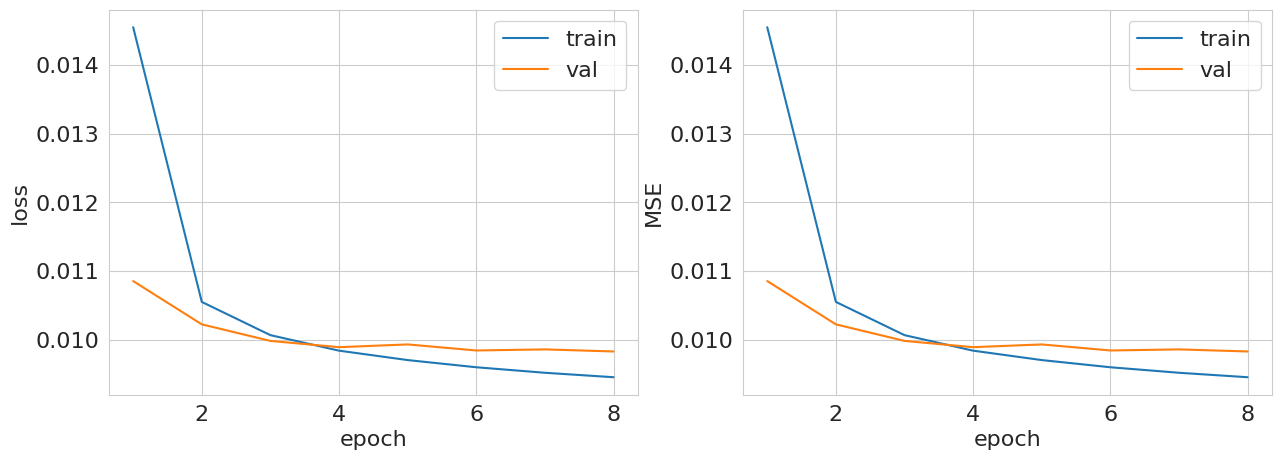

Validation MSE: 0.010


(0.0094596362687843, 0.009833657940876277)

In [ ]:
train_and_validate(model, optimizer, criterion, lambda y_pred, y: torch.sum((y_pred - y) ** 2) / y.shape[0], train_loader, test_loader,
                       num_epochs)

🐑 Действительно, по графикам видно, что наша синяя кривая стала быстрее уменьшаться чем оранжевая, т.е. заметно переобучение.

🐢 Попробуем более глубокую нейронную сеть:

In [ ]:
num_epochs = 8
dataset_train = TensorDataset(torch.from_numpy(X_train_scaled).to(torch.float32).to(device), torch.from_numpy(y_train.reshape(-1, 1)).to(torch.float32).to(device))
dataset_test = TensorDataset(torch.from_numpy(X_test_scaled).to(torch.float32).to(device), torch.from_numpy(y_test.reshape(-1, 1)).to(torch.float32).to(device))
train_loader = DataLoader(dataset_train, batch_size=64, shuffle=True)
test_loader = DataLoader(dataset_test, batch_size=64, shuffle=False)

model = nn.Sequential(
    nn.Linear(90, 128),
    nn.ReLU(),
    nn.Linear(128, 64),
    nn.ReLU(),
    nn.Linear(64, 1),
    nn.Sigmoid()
).to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=0.0001)
criterion = torch.nn.MSELoss().to(device)
scheduler = torch.optim.lr_scheduler.CosineAnnealingLR(optimizer, num_epochs)

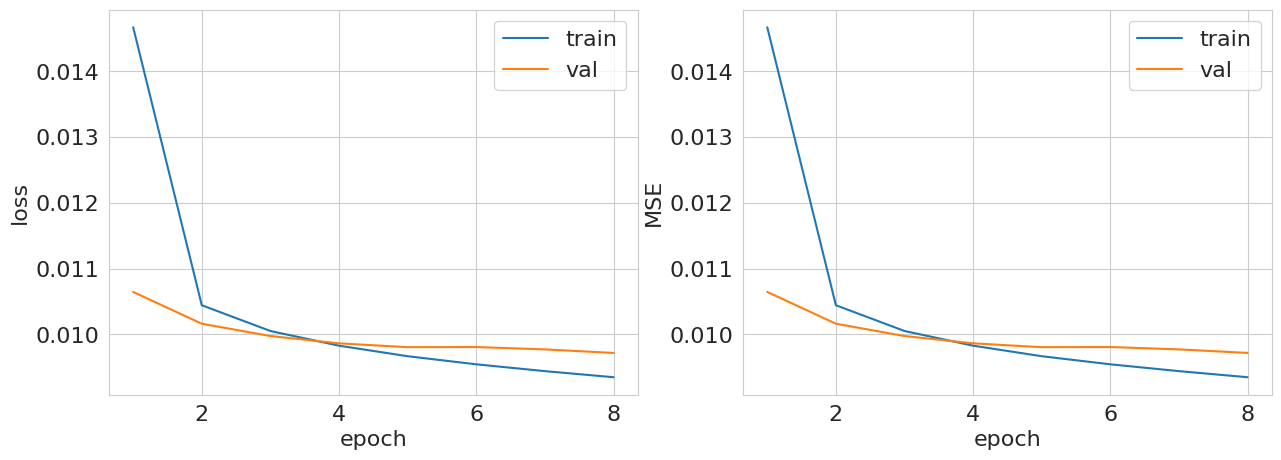

Validation MSE: 0.010


(0.009347761983065512, 0.009717253964452869)

In [ ]:
train_and_validate(model, optimizer, criterion, lambda y_pred, y: torch.sum((y_pred - y) ** 2) / y.shape[0], train_loader, test_loader,
                       num_epochs)

🐇 Здесь тоже мы можем заметить переобучение, но сравнительно прошлых экспериментов метрика качества для валидации меньше на одну десятитысячную.

**Задание 2.3 (1 балл).** Как вы должны были заметить, более сложная модель стала сильнее переобучаться. Попробуем добавить в обучение регуляризацию, чтобы бороться с переобучением. Добавьте слой дропаута ([`nn.Dropout`](https://pytorch.org/docs/stable/generated/torch.nn.Dropout.html#torch.nn.Dropout)) с параметром $p=0.2$ после каждого линейного слоя, кроме последнего. Почитать про дропаут можете в следующем [блогпосте](https://medium.com/@amarbudhiraja/https-medium-com-amarbudhiraja-learning-less-to-learn-better-dropout-in-deep-machine-learning-74334da4bfc5) или в оригинальной [статье](https://jmlr.org/papers/volume15/srivastava14a/srivastava14a.pdf)

Опишите результаты. 

In [36]:
num_epochs = 8
dataset_train = TensorDataset(torch.from_numpy(X_train_scaled).to(torch.float32).to(device), torch.from_numpy(y_train.reshape(-1, 1)).to(torch.float32).to(device))
dataset_test = TensorDataset(torch.from_numpy(X_test_scaled).to(torch.float32).to(device), torch.from_numpy(y_test.reshape(-1, 1)).to(torch.float32).to(device))
train_loader = DataLoader(dataset_train, batch_size=64, shuffle=True)
test_loader = DataLoader(dataset_test, batch_size=64, shuffle=False)

model = nn.Sequential(
    nn.Linear(90, 128),
    nn.Dropout(0.2),
    nn.ReLU(),
    nn.Linear(128, 64),
    nn.Dropout(0.2),
    nn.ReLU(),
    nn.Linear(64, 1),
    nn.Sigmoid()
).to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=0.0001)
criterion = torch.nn.MSELoss().to(device)
scheduler = torch.optim.lr_scheduler.CosineAnnealingLR(optimizer, num_epochs)

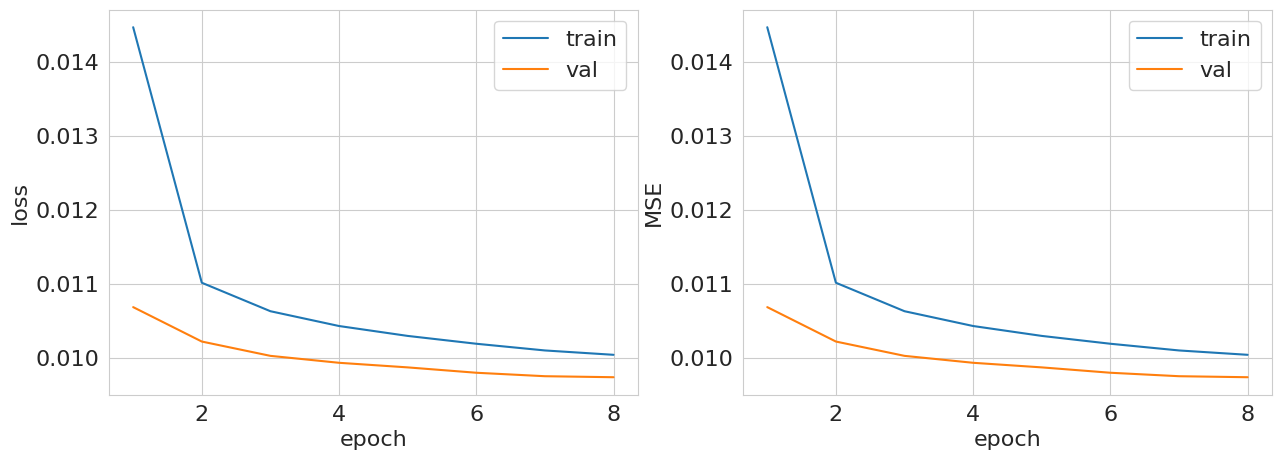

Validation MSE: 0.010


(0.010038042742619414, 0.009735174878387475)

In [37]:
train_and_validate(model, optimizer, criterion, lambda y_pred, y: torch.sum((y_pred - y) ** 2) / y.shape[0], train_loader, test_loader,
                       num_epochs)

🐧 Результаты эксперимента показывают, что нам удалось с помощью регуляризации справиться с переобучением, т.к. согласно графикам кривые лосса и метрики падают почти с одниковой скоростью, что оч хорошо. Добавление слоя Dropout очевидно помогло 😀 И на валидации мы получили того же порядка метрику.

**Задание 2.4 (1.5 балла).** Теперь, когда мы определились с выбором архитектуры нейронной сети, пора заняться рутиной DL-инженера &mdash; перебором гиперпараметров. Подберите оптимальное значение lr по значению MSE на валидации (по логарифмической сетке, достаточно посмотреть 3-4 значения), можете воспользоваться `verbose=False` в функции `train_and_validate`.

Также подберем оптимальное значение параметра weight decay для данного lr. Weight decay &mdash; это аналог L2-регуляризации для нейронных сетей. Почитать о нем можно, например, [здесь](https://paperswithcode.com/method/weight-decay). В PyTorch он задается как параметр оптимизатора `weight_decay`. Подберите оптимальное значение weight decay по логарифимической сетке (его типичные значения лежат в диапазоне $[10^{-6}, 10^{-3}]$, но не забудьте включить нулевое значение в сетку).

Постройте графики зависимости MSE на трейне и на валидации от значений параметров. Прокомментируйте получившиеся зависимости.

In [49]:
from scipy.stats import loguniform

lr_vals = loguniform.rvs(1e-5, 1e-2, size=10)
wd_vals = loguniform.rvs(1e-6, 1e-3, size=10)

In [50]:
lr_vals

array([2.67537732e-04, 2.16726595e-05, 1.45089956e-04, 1.02840593e-03,
       2.78559560e-03, 8.37283566e-03, 5.87803544e-05, 3.81160693e-03,
       5.78121433e-03, 3.29068209e-05])

In [52]:
loss = 1e+10
num_epochs = 8
dataset_train = TensorDataset(torch.from_numpy(X_train_scaled).to(torch.float32).to(device), torch.from_numpy(y_train.reshape(-1, 1)).to(torch.float32).to(device))
dataset_test = TensorDataset(torch.from_numpy(X_test_scaled).to(torch.float32).to(device), torch.from_numpy(y_test.reshape(-1, 1)).to(torch.float32).to(device))
train_loader = DataLoader(dataset_train, batch_size=64, shuffle=True)
test_loader = DataLoader(dataset_test, batch_size=64, shuffle=False)
count = 1
for lr in tqdm(lr_vals):
    for weight_decay in wd_vals:
        model = nn.Sequential(
        nn.Linear(90, 128),
        nn.Dropout(0.2),
        nn.ReLU(),
        nn.Linear(128, 64),
        nn.Dropout(0.2),
        nn.ReLU(),
        nn.Linear(64, 1),
        nn.Sigmoid()
        ).to(device)
        optimizer = torch.optim.Adam(model.parameters(), lr=lr, weight_decay=weight_decay)
        criterion = torch.nn.MSELoss().to(device)
        scheduler = torch.optim.lr_scheduler.CosineAnnealingLR(optimizer, num_epochs)
        train_metrics, val_metrics = train_and_validate(model, optimizer, criterion, lambda y_pred, y: torch.sum((y_pred - y) ** 2) / y.shape[0], train_loader, test_loader,
                           num_epochs, verbose=False)
        print('|--|--|--|--|--|--|--|--|--|--|--|--|--|--|--|--|')
        print('experiment #', count)
        print('lr:', lr, 'weight_decay:', weight_decay)
        print('train_metrics:', train_metrics, 'val_metrics:', val_metrics)
        if val_metrics < loss:
            lr_best, wd_best = lr, weight_decay
            loss = val_metrics
        count += 1

  0%|                                                    | 0/10 [00:00<?, ?it/s]

|--|--|--|--|--|--|--|--|--|--|--|--|--|--|--|--|
experiment # 1
lr: 0.0002675377317928064 weight_decay: 5.082264601869264e-06
train_metrics: 0.009667802945112856 val_metrics: 0.009550440196064542
|--|--|--|--|--|--|--|--|--|--|--|--|--|--|--|--|
experiment # 2
lr: 0.0002675377317928064 weight_decay: 4.632659568288444e-06
train_metrics: 0.009707744596880749 val_metrics: 0.009567490040196254
|--|--|--|--|--|--|--|--|--|--|--|--|--|--|--|--|
experiment # 3
lr: 0.0002675377317928064 weight_decay: 1.1134454803822138e-05
train_metrics: 0.009713718836689053 val_metrics: 0.009562507503120847
|--|--|--|--|--|--|--|--|--|--|--|--|--|--|--|--|
experiment # 4
lr: 0.0002675377317928064 weight_decay: 0.00010503046856712534
train_metrics: 0.010084476589955024 val_metrics: 0.009823781970179864
|--|--|--|--|--|--|--|--|--|--|--|--|--|--|--|--|
experiment # 5
lr: 0.0002675377317928064 weight_decay: 7.995613775621633e-06
train_metrics: 0.00963041024687365 val_metrics: 0.009507157162745099
|--|--|--|--|-

 10%|████                                     | 1/10 [11:05<1:39:50, 665.61s/it]

|--|--|--|--|--|--|--|--|--|--|--|--|--|--|--|--|
experiment # 10
lr: 0.0002675377317928064 weight_decay: 0.00022418345532023928
train_metrics: 0.01029322787119282 val_metrics: 0.009971255142762123
|--|--|--|--|--|--|--|--|--|--|--|--|--|--|--|--|
experiment # 11
lr: 2.1672659479525034e-05 weight_decay: 5.082264601869264e-06
train_metrics: 0.010884361843848844 val_metrics: 0.01025674772067528
|--|--|--|--|--|--|--|--|--|--|--|--|--|--|--|--|
experiment # 12
lr: 2.1672659479525034e-05 weight_decay: 4.632659568288444e-06
train_metrics: 0.010948371360312492 val_metrics: 0.010304331287283985
|--|--|--|--|--|--|--|--|--|--|--|--|--|--|--|--|
experiment # 13
lr: 2.1672659479525034e-05 weight_decay: 1.1134454803822138e-05
train_metrics: 0.010882167583978615 val_metrics: 0.010283293574702916
|--|--|--|--|--|--|--|--|--|--|--|--|--|--|--|--|
experiment # 14
lr: 2.1672659479525034e-05 weight_decay: 0.00010503046856712534
train_metrics: 0.010695064216718665 val_metrics: 0.010151298351074284
|--|-

 20%|████████▏                                | 2/10 [21:20<1:24:44, 635.62s/it]

|--|--|--|--|--|--|--|--|--|--|--|--|--|--|--|--|
experiment # 20
lr: 2.1672659479525034e-05 weight_decay: 0.00022418345532023928
train_metrics: 0.010634193874563474 val_metrics: 0.01012316403929446
|--|--|--|--|--|--|--|--|--|--|--|--|--|--|--|--|
experiment # 21
lr: 0.00014508995592464428 weight_decay: 5.082264601869264e-06
train_metrics: 0.009874046271882224 val_metrics: 0.009622583425056971
|--|--|--|--|--|--|--|--|--|--|--|--|--|--|--|--|
experiment # 22
lr: 0.00014508995592464428 weight_decay: 4.632659568288444e-06
train_metrics: 0.009818863298571668 val_metrics: 0.009563019791989775
|--|--|--|--|--|--|--|--|--|--|--|--|--|--|--|--|
experiment # 23
lr: 0.00014508995592464428 weight_decay: 1.1134454803822138e-05
train_metrics: 0.00983382254646222 val_metrics: 0.009602629422251383
|--|--|--|--|--|--|--|--|--|--|--|--|--|--|--|--|
experiment # 24
lr: 0.00014508995592464428 weight_decay: 0.00010503046856712534
train_metrics: 0.010041663638115261 val_metrics: 0.0097458194492959
|--|--

 30%|████████████▎                            | 3/10 [32:13<1:15:06, 643.74s/it]

|--|--|--|--|--|--|--|--|--|--|--|--|--|--|--|--|
experiment # 30
lr: 0.00014508995592464428 weight_decay: 0.00022418345532023928
train_metrics: 0.010232521639804476 val_metrics: 0.009903226652491933
|--|--|--|--|--|--|--|--|--|--|--|--|--|--|--|--|
experiment # 31
lr: 0.0010284059305126012 weight_decay: 5.082264601869264e-06
train_metrics: 0.009760932046554191 val_metrics: 0.009730079259152185
|--|--|--|--|--|--|--|--|--|--|--|--|--|--|--|--|
experiment # 32
lr: 0.0010284059305126012 weight_decay: 4.632659568288444e-06
train_metrics: 0.009783655769619074 val_metrics: 0.009604153361768748
|--|--|--|--|--|--|--|--|--|--|--|--|--|--|--|--|
experiment # 33
lr: 0.0010284059305126012 weight_decay: 1.1134454803822138e-05
train_metrics: 0.009898707596587243 val_metrics: 0.009672124304863318
|--|--|--|--|--|--|--|--|--|--|--|--|--|--|--|--|
experiment # 34
lr: 0.0010284059305126012 weight_decay: 0.00010503046856712534
train_metrics: 0.010419267625038961 val_metrics: 0.010057767477115285
|--|--

 40%|████████████████▍                        | 4/10 [43:46<1:06:18, 663.04s/it]

|--|--|--|--|--|--|--|--|--|--|--|--|--|--|--|--|
experiment # 40
lr: 0.0010284059305126012 weight_decay: 0.00022418345532023928
train_metrics: 0.010660238828348751 val_metrics: 0.010225694410806039
|--|--|--|--|--|--|--|--|--|--|--|--|--|--|--|--|
experiment # 41
lr: 0.0027855955978217236 weight_decay: 5.082264601869264e-06
train_metrics: 0.0102619577145336 val_metrics: 0.00983626605778306
|--|--|--|--|--|--|--|--|--|--|--|--|--|--|--|--|
experiment # 42
lr: 0.0027855955978217236 weight_decay: 4.632659568288444e-06
train_metrics: 0.01025871462137594 val_metrics: 0.009876070098601489
|--|--|--|--|--|--|--|--|--|--|--|--|--|--|--|--|
experiment # 43
lr: 0.0027855955978217236 weight_decay: 1.1134454803822138e-05
train_metrics: 0.010395260023581257 val_metrics: 0.010124858871990855
|--|--|--|--|--|--|--|--|--|--|--|--|--|--|--|--|
experiment # 44
lr: 0.0027855955978217236 weight_decay: 0.00010503046856712534
train_metrics: 0.010891787662487828 val_metrics: 0.01036766786861127
|--|--|--|--

 50%|█████████████████████▌                     | 5/10 [56:16<57:52, 694.52s/it]

|--|--|--|--|--|--|--|--|--|--|--|--|--|--|--|--|
experiment # 50
lr: 0.0027855955978217236 weight_decay: 0.00022418345532023928
train_metrics: 0.011072112655598427 val_metrics: 0.010403231952361647
|--|--|--|--|--|--|--|--|--|--|--|--|--|--|--|--|
experiment # 51
lr: 0.008372835656812374 weight_decay: 5.082264601869264e-06
train_metrics: 0.011057614145694636 val_metrics: 0.010430809836886282
|--|--|--|--|--|--|--|--|--|--|--|--|--|--|--|--|
experiment # 52
lr: 0.008372835656812374 weight_decay: 4.632659568288444e-06
train_metrics: 0.011059953831621356 val_metrics: 0.010307061751513746
|--|--|--|--|--|--|--|--|--|--|--|--|--|--|--|--|
experiment # 53
lr: 0.008372835656812374 weight_decay: 1.1134454803822138e-05
train_metrics: 0.011160819823912031 val_metrics: 0.01043642346432092
|--|--|--|--|--|--|--|--|--|--|--|--|--|--|--|--|
experiment # 54
lr: 0.008372835656812374 weight_decay: 0.00010503046856712534
train_metrics: 0.011598444695135962 val_metrics: 0.01096068280107766
|--|--|--|--|

 60%|████████████████████████▌                | 6/10 [1:07:47<46:13, 693.33s/it]

|--|--|--|--|--|--|--|--|--|--|--|--|--|--|--|--|
experiment # 60
lr: 0.008372835656812374 weight_decay: 0.00022418345532023928
train_metrics: 0.011811974961957229 val_metrics: 0.011000678870890918
|--|--|--|--|--|--|--|--|--|--|--|--|--|--|--|--|
experiment # 61
lr: 5.878035436435622e-05 weight_decay: 5.082264601869264e-06
train_metrics: 0.010259407502392077 val_metrics: 0.009838463547418784
|--|--|--|--|--|--|--|--|--|--|--|--|--|--|--|--|
experiment # 62
lr: 5.878035436435622e-05 weight_decay: 4.632659568288444e-06
train_metrics: 0.010193778810283141 val_metrics: 0.009808501793657354
|--|--|--|--|--|--|--|--|--|--|--|--|--|--|--|--|
experiment # 63
lr: 5.878035436435622e-05 weight_decay: 1.1134454803822138e-05
train_metrics: 0.010191470826200196 val_metrics: 0.009788701098490605
|--|--|--|--|--|--|--|--|--|--|--|--|--|--|--|--|
experiment # 64
lr: 5.878035436435622e-05 weight_decay: 0.00010503046856712534
train_metrics: 0.01019281276499476 val_metrics: 0.009802842132147164
|--|--|--

 70%|████████████████████████████▋            | 7/10 [1:19:00<34:19, 686.49s/it]

|--|--|--|--|--|--|--|--|--|--|--|--|--|--|--|--|
experiment # 70
lr: 5.878035436435622e-05 weight_decay: 0.00022418345532023928
train_metrics: 0.01020262417048242 val_metrics: 0.009881916267796078
|--|--|--|--|--|--|--|--|--|--|--|--|--|--|--|--|
experiment # 71
lr: 0.0038116069260753084 weight_decay: 5.082264601869264e-06
train_metrics: 0.010444312559792345 val_metrics: 0.009982077163821476
|--|--|--|--|--|--|--|--|--|--|--|--|--|--|--|--|
experiment # 72
lr: 0.0038116069260753084 weight_decay: 4.632659568288444e-06
train_metrics: 0.010438847184833741 val_metrics: 0.010103073560666588
|--|--|--|--|--|--|--|--|--|--|--|--|--|--|--|--|
experiment # 73
lr: 0.0038116069260753084 weight_decay: 1.1134454803822138e-05
train_metrics: 0.010585229346157425 val_metrics: 0.01010234217370188
|--|--|--|--|--|--|--|--|--|--|--|--|--|--|--|--|
experiment # 74
lr: 0.0038116069260753084 weight_decay: 0.00010503046856712534
train_metrics: 0.01102763884300828 val_metrics: 0.010470388928644993
|--|--|--|

 80%|████████████████████████████████▊        | 8/10 [1:30:49<23:07, 693.73s/it]

|--|--|--|--|--|--|--|--|--|--|--|--|--|--|--|--|
experiment # 80
lr: 0.0038116069260753084 weight_decay: 0.00022418345532023928
train_metrics: 0.011259046623969078 val_metrics: 0.010544322551240952
|--|--|--|--|--|--|--|--|--|--|--|--|--|--|--|--|
experiment # 81
lr: 0.005781214330539895 weight_decay: 5.082264601869264e-06
train_metrics: 0.010738553038991723 val_metrics: 0.010305848463284126
|--|--|--|--|--|--|--|--|--|--|--|--|--|--|--|--|
experiment # 82
lr: 0.005781214330539895 weight_decay: 4.632659568288444e-06
train_metrics: 0.010721909609717833 val_metrics: 0.0101271289550739
|--|--|--|--|--|--|--|--|--|--|--|--|--|--|--|--|
experiment # 83
lr: 0.005781214330539895 weight_decay: 1.1134454803822138e-05
train_metrics: 0.010862113866350281 val_metrics: 0.010298548859620586
|--|--|--|--|--|--|--|--|--|--|--|--|--|--|--|--|
experiment # 84
lr: 0.005781214330539895 weight_decay: 0.00010503046856712534
train_metrics: 0.011321839770759784 val_metrics: 0.011020601398473015
|--|--|--|--|

 90%|████████████████████████████████████▉    | 9/10 [1:42:48<11:41, 701.78s/it]

|--|--|--|--|--|--|--|--|--|--|--|--|--|--|--|--|
experiment # 90
lr: 0.005781214330539895 weight_decay: 0.00022418345532023928
train_metrics: 0.011529342942372527 val_metrics: 0.010810045710021622
|--|--|--|--|--|--|--|--|--|--|--|--|--|--|--|--|
experiment # 91
lr: 3.2906820887482914e-05 weight_decay: 5.082264601869264e-06
train_metrics: 0.01061378482173682 val_metrics: 0.010068226352578273
|--|--|--|--|--|--|--|--|--|--|--|--|--|--|--|--|
experiment # 92
lr: 3.2906820887482914e-05 weight_decay: 4.632659568288444e-06
train_metrics: 0.010674319461318998 val_metrics: 0.01013258825838052
|--|--|--|--|--|--|--|--|--|--|--|--|--|--|--|--|
experiment # 93
lr: 3.2906820887482914e-05 weight_decay: 1.1134454803822138e-05
train_metrics: 0.010548381360214954 val_metrics: 0.010059993196578779
|--|--|--|--|--|--|--|--|--|--|--|--|--|--|--|--|
experiment # 94
lr: 3.2906820887482914e-05 weight_decay: 0.00010503046856712534
train_metrics: 0.0104710449138863 val_metrics: 0.009958655021110676
|--|--|-

100%|████████████████████████████████████████| 10/10 [1:53:46<00:00, 682.62s/it]

|--|--|--|--|--|--|--|--|--|--|--|--|--|--|--|--|
experiment # 100
lr: 3.2906820887482914e-05 weight_decay: 0.00022418345532023928
train_metrics: 0.010424035136175458 val_metrics: 0.009989186860076004


🫎 источник https://docs.ray.io/en/latest/tune/examples/tune-pytorch-cifar.html#tune-pytorch-cifar-ref

Как вы могли заметить, еще одна рутина DL-инженера &mdash; утомительное ожидание обучения моделей.

**Задание 2.5 (0.5 балла).** Мы провели большое число экспериментов и подобрали оптимальную архитектуру и гиперпараметры. Пришло время обучить модель на полной обучающей выборке, померять качество на тестовой выборке и сравнить с бейзлайнами. Проделайте это. 

In [55]:
num_epochs = 8
dataset_train = TensorDataset(torch.from_numpy(X_train_scaled).to(torch.float32).to(device), torch.from_numpy(y_train.reshape(-1, 1)).to(torch.float32).to(device))
dataset_test = TensorDataset(torch.from_numpy(X_test_scaled).to(torch.float32).to(device), torch.from_numpy(y_test.reshape(-1, 1)).to(torch.float32).to(device))
train_loader = DataLoader(dataset_train, batch_size=64, shuffle=True)
test_loader = DataLoader(dataset_test, batch_size=64, shuffle=False)

model = nn.Sequential(
    nn.Linear(90, 128),
    nn.Dropout(0.2),
    nn.ReLU(),
    nn.Linear(128, 64),
    nn.Dropout(0.2),
    nn.ReLU(),
    nn.Linear(64, 1),
    nn.Sigmoid()
).to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=lr_best, weight_decay=wd_best)
criterion = torch.nn.MSELoss().to(device)
scheduler = torch.optim.lr_scheduler.CosineAnnealingLR(optimizer, num_epochs)

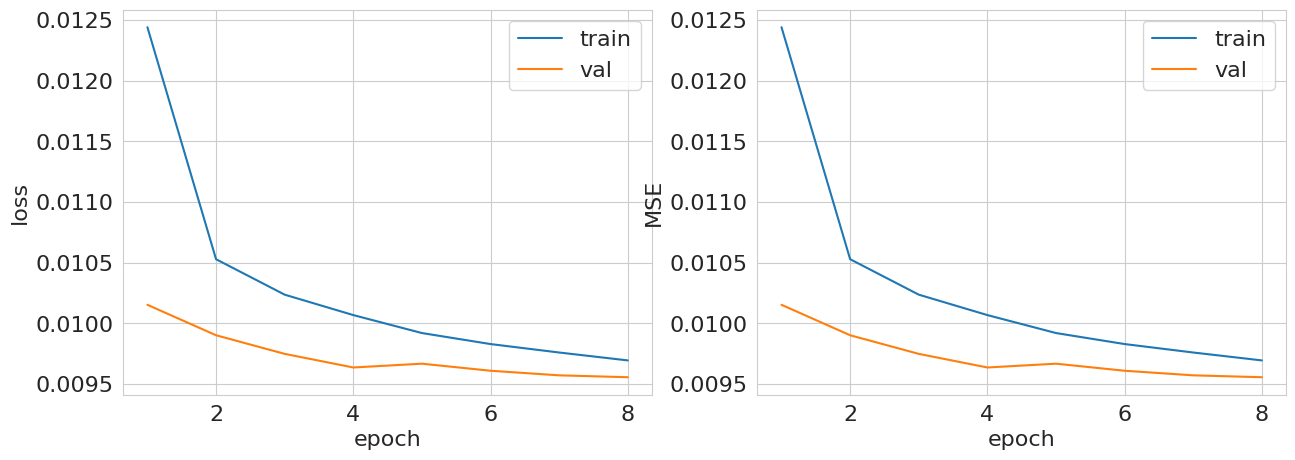

Validation MSE: 0.010


(0.00969516767343724, 0.009556643378945857)

In [56]:
train_and_validate(model, optimizer, criterion, lambda y_pred, y: torch.sum((y_pred - y) ** 2) / y.shape[0], train_loader, test_loader,
                       num_epochs)

🐝 Удалось повысить качество предсказаний с помощью следующих шагов:
    🐜 нормализация таргета;
    🦗 нормализация признаков;
    🐞 добавление еще одного скрытого слоя (увеличение глубины модели);
    🦋 добавление регуляризации с помощью Dropout;
    🪰 выбор оптимальных значений для гиперпараметров learning_rate и weight_decay.

mse на валидационной выборке для бейзлайна 0.0113 ниже чем для построенной нейросети на 2 тысячные.

😁 Спасибо за проверку ДЗ!